In [92]:
import math

from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Express

Wikipedia has some information on generating coprime pairs: https://en.wikipedia.org/wiki/Coprime_integers

In [49]:
def get_coprime_pairs(limit):
    pairs=dict()

    def build(m, n):
        p = (m, n)
        pairs[p]=[]
        
        for pc in [(2*m - n, m), (2*m + n, m), (m + 2*n, n)]:
            if pc[0] <= 20:
                pairs[p].append(pc)
                build(pc[0], pc[1])
    
    build(2, 1)
    build(3, 1)
    #for k, v in pairs.items():
    #    print(k, v)
    
    return sorted(pairs.keys())

pairs=get_coprime_pairs(20)
pairs

[(2, 1),
 (3, 1),
 (3, 2),
 (4, 1),
 (4, 3),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 1),
 (6, 5),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (9, 1),
 (9, 2),
 (9, 4),
 (9, 5),
 (9, 7),
 (9, 8),
 (10, 1),
 (10, 3),
 (10, 7),
 (10, 9),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (11, 8),
 (11, 9),
 (11, 10),
 (12, 1),
 (12, 5),
 (12, 7),
 (12, 11),
 (13, 1),
 (13, 2),
 (13, 3),
 (13, 4),
 (13, 5),
 (13, 6),
 (13, 7),
 (13, 8),
 (13, 9),
 (13, 10),
 (13, 11),
 (13, 12),
 (14, 1),
 (14, 3),
 (14, 5),
 (14, 9),
 (14, 11),
 (14, 13),
 (15, 1),
 (15, 2),
 (15, 4),
 (15, 7),
 (15, 8),
 (15, 11),
 (15, 13),
 (15, 14),
 (16, 1),
 (16, 3),
 (16, 5),
 (16, 7),
 (16, 9),
 (16, 11),
 (16, 13),
 (16, 15),
 (17, 1),
 (17, 2),
 (17, 3),
 (17, 4),
 (17, 5),
 (17, 6),
 (17, 7),
 (17, 8),
 (17, 9),
 (17, 10),
 (17, 11),
 (17, 12),
 (17, 13),
 (17, 14),
 (17, 15),
 (17, 16),
 (18, 1),
 (18, 5),
 (18, 7),
 (18, 11),
 (18, 13),
 (18,

In [50]:
def interference(m, n):
    for i in range(m, m*(n+1), m):
        if i == m*n:
            return i
        elif (i-1)%n == 0:
            return i
        elif (i+1)%n == 0:
            return i+1
  
interference(7, 5)

15

In [51]:
maxp=None
maxi=0
for p in pairs:
    i = interference(*p)
    #print(p, i)
    if i > maxi:
        maxp=p
        maxi=i
print(maxp, maxi)

(19, 17) 153


In [31]:
interference(20, 17)

120

In [54]:
x = np.arange(0, 10, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [86]:
ax = 3*np.cos(x*2*math.pi/3)
ay = 3*np.sin(x*2*math.pi/3)
bx = 4*np.cos(x*2*math.pi/4)
by = 4*np.sin(x*2*math.pi/4)
cx = 5*np.cos(x*2*math.pi/5)
cy = 5*np.sin(x*2*math.pi/5)

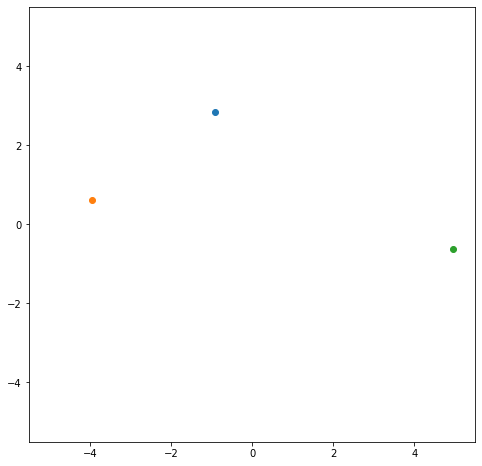

In [112]:
fig, axis = plt.subplots(1,1, figsize=(8, 8))

axis.set_ylim(-5.5, 5.5)
axis.set_xlim(-5.5, 5.5)
a, = axis.plot([], [], 'o')
b, = axis.plot([], [], 'o')
c, = axis.plot([], [], 'o')

def init():
    a.set_data([], [])
    b.set_data([], [])
    c.set_data([], [])
    return a, b, c,

def update(i):
    a.set_data(ax[i], ay[i])
    b.set_data(bx[i], by[i])
    c.set_data(cx[i], cy[i])
    return a, b, c,
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(x), blit=True)
HTML(anim.to_html5_video())
#axis.plot(x, ay)
#axis.plot(x, bx)
#axis.plot(x, cx)
#fig.show()